In [1]:
!nvidia-smi

Sat Nov 23 15:06:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [3]:
!python -V

Python 3.6.8


In [4]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 450kB 41.7MB/s 
     |████████████████████████████████| 3.8MB 27.8MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled googl

In [6]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [0]:
#tf.compat.v1.enable_eager_execution()
tf.compat.v1.disable_eager_execution()

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


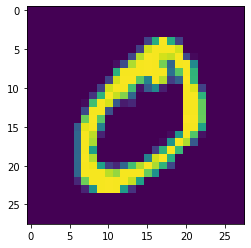

In [9]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from tensorflow.keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', use_bias = False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 10, kernel_size = (1, 1), activation='relu', use_bias = False)) #22

model.add(MaxPool2D(pool_size=(2, 2)))#11

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(filters = 12, kernel_size = (3, 3), activation='relu', use_bias = False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu', use_bias = False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 10, kernel_size = (2, 2)))
#model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_62 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_62 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_63 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_63 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 10)       

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
Epoch 1/20
60000/60000 [==============================] - 18s 307us/sample - loss: 0.5462 - accuracy: 0.8163 - val_loss: 0.1993 - val_accuracy: 0.9437

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
Epoch 2/20
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1759 - accuracy: 0.9351 - val_loss: 0.1033 - val_accuracy: 0.9700

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
Epoch 3/20
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1427 - accuracy: 0.9425 - val_loss: 0.0435 - val_accuracy: 0.9865

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
Epoch 4/20
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1312 - accuracy: 0.9452 - val_loss: 0.0370 - val_accuracy: 0.9899

Epoch 00005: LearningRateScheduler reducing lear

In [31]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02231893451032538, 0.994]
